In [2]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid
import os
from typing import List
from tqdm.notebook import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score


In [3]:

def show_counts(train_dir: str) -> None:
    class_counts = {}
    total_count = 0 
    for class_name in os.listdir(train_dir):
        class_path = os.path.join(train_dir, class_name)
        
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[class_name] = num_images
            total_count += num_images
    class_weights = {}
    sum_of_weights = 0
    for class_name, count in class_counts.items():
        print(f"Class '{class_name}' contains {count} images.")
        class_weights[class_name] = total_count / count
        sum_of_weights += total_count / count
    class_weights_norm = {class_name: weight / sum_of_weights for class_name, weight in class_weights.items()}
    
    return class_weights, class_weights_norm


In [4]:
train_class_weights, train_class_weights_norm = show_counts("./Teeth DataSet/Teeth_Dataset/Training")

Class 'CaS' contains 480 images.
Class 'CoS' contains 450 images.
Class 'Gum' contains 360 images.
Class 'MC' contains 540 images.
Class 'OC' contains 324 images.
Class 'OLP' contains 540 images.
Class 'OT' contains 393 images.


In [5]:
train_class_weights

{'CaS': 6.43125,
 'CoS': 6.86,
 'Gum': 8.575,
 'MC': 5.716666666666667,
 'OC': 9.527777777777779,
 'OLP': 5.716666666666667,
 'OT': 7.854961832061068}

In [6]:
train_class_weights_norm

{'CaS': 0.12689335505026225,
 'CoS': 0.13535291205361308,
 'Gum': 0.16919114006701633,
 'MC': 0.11279409337801088,
 'OC': 0.18799015563001817,
 'OLP': 0.11279409337801088,
 'OT': 0.15498425044306838}

In [7]:
show_counts("./Teeth DataSet/Teeth_Dataset/Validation")

Class 'CaS' contains 160 images.
Class 'CoS' contains 149 images.
Class 'Gum' contains 120 images.
Class 'MC' contains 180 images.
Class 'OC' contains 108 images.
Class 'OLP' contains 180 images.
Class 'OT' contains 131 images.


({'CaS': 6.425,
  'CoS': 6.899328859060403,
  'Gum': 8.566666666666666,
  'MC': 5.711111111111111,
  'OC': 9.518518518518519,
  'OLP': 5.711111111111111,
  'OT': 7.847328244274809},
 {'CaS': 0.1267781886273388,
  'CoS': 0.13613765221727658,
  'Gum': 0.16903758483645173,
  'MC': 0.11269172322430117,
  'OC': 0.1878195387071686,
  'OLP': 0.11269172322430117,
  'OT': 0.1548435891631619})

In [8]:
show_counts("./Teeth DataSet/Teeth_Dataset/Testing")

Class 'CaS' contains 160 images.
Class 'CoS' contains 149 images.
Class 'Gum' contains 120 images.
Class 'MC' contains 180 images.
Class 'OC' contains 108 images.
Class 'OLP' contains 180 images.
Class 'OT' contains 131 images.


({'CaS': 6.425,
  'CoS': 6.899328859060403,
  'Gum': 8.566666666666666,
  'MC': 5.711111111111111,
  'OC': 9.518518518518519,
  'OLP': 5.711111111111111,
  'OT': 7.847328244274809},
 {'CaS': 0.1267781886273388,
  'CoS': 0.13613765221727658,
  'Gum': 0.16903758483645173,
  'MC': 0.11269172322430117,
  'OC': 0.1878195387071686,
  'OLP': 0.11269172322430117,
  'OT': 0.1548435891631619})

In [9]:
im_target_shape = (224, 224)
train_transform = transforms.Compose([
    transforms.Resize(im_target_shape),
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.RandomRotation(10),      # Randomly rotate the image by up to 10 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_transform = transforms.Compose([
    transforms.Resize(im_target_shape),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
dir_path = './Teeth DataSet/Teeth_Dataset'
train_dataset = ImageFolder(root=f'{dir_path}/Training', transform=train_transform)
val_dataset = ImageFolder(root=f'{dir_path}/Validation', transform=test_transform)
test_dataset = ImageFolder(root=f'{dir_path}/Testing', transform=test_transform)

batch_size = 16
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)


In [10]:
len(train_dataset), len(val_dataset), len(test_dataset)

(3087, 1028, 1028)

In [11]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 3087
    Root location: ./Teeth DataSet/Teeth_Dataset/Training
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.2, 0.2))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224]) 0


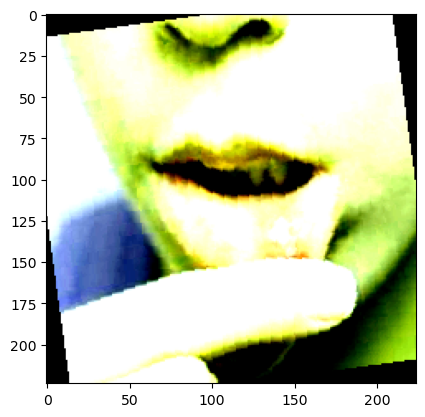

In [12]:
for images, labels in train_dataset:
    print(images.shape, labels)
    plt.imshow(images.permute(1, 2, 0))
    break

In [13]:
# Example of iterating over the training data
for images, labels in train_loader:
    # Your training code here
    print(images.shape, labels.shape)
    break

torch.Size([16, 3, 224, 224]) torch.Size([16])


# Visualizations

In [14]:
def unnormalize(img: torch.Tensor, mean: List[float], std: List[float]):
    unnorm_img = img.clone()  # Clone the image tensor to avoid modifying the original
    for t, m, s in zip(unnorm_img, mean, std):
        t.mul_(s).add_(m)  # Unnormalize each channel separately
    return unnorm_img

def imshow(img: torch.Tensor):
    unnorm_img = unnormalize(img, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    npimg = unnorm_img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


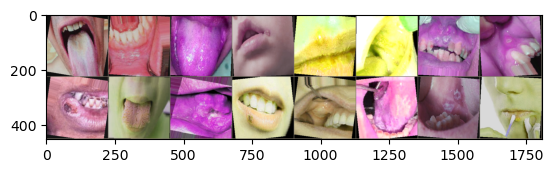

In [15]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(make_grid(images[:16])) 


# Model

In [16]:
class Block(torch.nn.Module):
    def __init__(self,in_channels: int, out_channels: int, kernel_size: int, padding: int, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.conv = torch.nn.Conv2d(kernel_size=kernel_size, padding=padding, in_channels=in_channels, out_channels=out_channels)
        self.bn = torch.nn.BatchNorm2d(num_features=out_channels)
        self.relu = torch.nn.ReLU()
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        x = self.pool(x)
        return x



class TeethModel(torch.nn.Module):
    def __init__(self, num_classes: int, im_shape: tuple, res_block_kwargs: dict, num_res_blocks: int = 5) -> None:
        super(TeethModel, self).__init__()
        res_list = nn.ModuleList()
        for i in range(num_res_blocks):
            if i==0:
                res_list.append(Block(**res_block_kwargs))
            else:
                res_list.append(Block(in_channels=res_block_kwargs['out_channels'], out_channels=res_block_kwargs['out_channels'], kernel_size=res_block_kwargs['kernel_size'], padding=res_block_kwargs['padding']))
        self.resnet_blocks = torch.nn.Sequential(*res_list)
        linear_input_shape = im_shape[0] * im_shape[1] * res_block_kwargs['out_channels']
        self.linear = torch.nn.LazyLinear(out_features=num_classes)
        
    def forward(self, x):
        x = self.resnet_blocks(x)
        x = x.view(x.size(0), -1)
        x = self.linear(x)
        return x

In [17]:
num_classes = len(train_dataset.classes)
num_classes

7

In [18]:
def calculate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = 100 * (y_true == y_pred).sum() / len(y_true)
    return accuracy, precision, recall, f1

In [19]:
def evaluate(dataloader, model, criterion, device=None):
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    else:
        device = torch.device(device)

    model = model.to(device)
    model.eval()
    running_loss = 0.0
    all_labels = []
    all_predictions = []

    with torch.no_grad():  
        for inputs, labels in tqdm(dataloader):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()

            predicted = torch.argmax(outputs, axis=-1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    # Calculate average loss
    avg_loss = running_loss / len(dataloader)

    # Calculate evaluation metrics
    accuracy, precision, recall, f1 = calculate_metrics(np.array(all_labels), np.array(all_predictions))

    return avg_loss, accuracy, precision, recall, f1


In [20]:

def train(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device=None):
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    model = model.to(device)

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Training phase
        model.train()  # Set model to training mode
        running_loss = 0.0
        all_labels = []
        all_predictions = []

        for inputs, labels in tqdm(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the parameter gradients

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Accumulate the loss
            running_loss += loss.item()

            # Get the predicted class
            predicted = torch.argmax(outputs, dim=1)

            # Store the labels and predictions for metrics calculation
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

        # Calculate average loss
        avg_train_loss = running_loss / len(train_loader)

        # Calculate training precision, recall, and F1 score
        train_accuracy, train_precision, train_recall, train_f1 = calculate_metrics(np.array(all_labels), np.array(all_predictions))
        print(f'Train Loss: {avg_train_loss:.4f}, Accuracy: {train_accuracy:.2f}%, '
              f'Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}')

        # Validation phase
        avg_val_loss, val_accuracy, val_precision, val_recall, val_f1 = evaluate(val_loader, model, criterion)

        print(f'Val Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.2f}%, '
              f'Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1 Score: {val_f1:.4f}')
        print("-"*50)

In [20]:
# Number of epochs
res_block_kwargs = {
    'in_channels': 3,
    'out_channels': 256,
    'kernel_size': 3,
    'padding': 1
}
model = TeethModel(num_classes=num_classes, res_block_kwargs=res_block_kwargs, im_shape=im_target_shape, num_res_blocks=3)
num_epochs = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_class_weights_norm_tensor = torch.tensor(list(train_class_weights_norm.values())).to(device)
criterion = nn.CrossEntropyLoss(weight=train_class_weights_norm_tensor)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [21]:
train(model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs)

Epoch 1/10
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 17.9462, Accuracy: 20.41%, Precision: 0.2062, Recall: 0.2041, F1 Score: 0.2038


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 7.6733, Accuracy: 28.40%, Precision: 0.2441, Recall: 0.2840, F1 Score: 0.2326
--------------------------------------------------
Epoch 2/10
----------


  0%|          | 0/193 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [22]:
torch.save(model, 'base_teeth_model.pth')

In [24]:
loss, acc, precision, recall, f1 = evaluate(test_loader, model, criterion, device='cuda')

  0%|          | 0/65 [00:00<?, ?it/s]

In [25]:
loss, acc, precision, recall, f1

(10.530888646382552,
 27.237354085603112,
 0.28878070694690233,
 0.2723735408560311,
 0.22008402885877262)

## VGG

In [21]:
class VGGBlock(nn.Module):
    def __init__(self, in_channels: int, out_channels: int, num_convs: int):
        super(VGGBlock, self).__init__()
        layers = []
        for _ in range(num_convs):
            layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
            layers.append(nn.ReLU(inplace=True))
            in_channels = out_channels
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        self.block = nn.Sequential(*layers)

    def forward(self, x):
        return self.block(x)
    


class VGG(nn.Module):
    def __init__(self, block_configs, num_classes=1000, init_weights=True):
        super(VGG, self).__init__()
        self.features = self._make_layers(block_configs)
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

    def _make_layers(self, block_configs):
        layers = []
        in_channels = 3
        for out_channels, num_convs in block_configs:
            layers.append(VGGBlock(in_channels, out_channels, num_convs))
            in_channels = out_channels
        return nn.Sequential(*layers)

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

vgg_configs = {
    'VGG11': [(64, 1), (128, 1), (256, 2), (512, 2), (512, 2)],
    'VGG13': [(64, 2), (128, 2), (256, 2), (512, 2), (512, 2)],
    'VGG16': [(64, 2), (128, 2), (256, 3), (512, 3), (512, 3)],
    'VGG19': [(64, 2), (128, 2), (256, 4), (512, 4), (512, 4)],
}

In [22]:
vgg_model = VGG(vgg_configs['VGG11'], num_classes=num_classes, init_weights=True)
num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_class_weights_norm_tensor = torch.tensor(list(train_class_weights_norm.values())).to(device)
criterion = nn.CrossEntropyLoss(weight=train_class_weights_norm_tensor)
optimizer = torch.optim.Adam(vgg_model.parameters(), lr=0.001)

In [23]:
train(vgg_model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs)

Epoch 1/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 2.1563, Accuracy: 13.57%, Precision: 0.1307, Recall: 0.1357, F1 Score: 0.1228


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9440, Accuracy: 12.74%, Precision: 0.0162, Recall: 0.1274, F1 Score: 0.0288
--------------------------------------------------
Epoch 2/20
----------


c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9471, Accuracy: 13.64%, Precision: 0.1242, Recall: 0.1364, F1 Score: 0.1138


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9448, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Epoch 3/20
----------


c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9467, Accuracy: 12.80%, Precision: 0.1308, Recall: 0.1280, F1 Score: 0.1093


c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9443, Accuracy: 14.49%, Precision: 0.0210, Recall: 0.1449, F1 Score: 0.0367
--------------------------------------------------
Epoch 4/20
----------


c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9465, Accuracy: 14.90%, Precision: 0.1018, Recall: 0.1490, F1 Score: 0.0870


c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9444, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Epoch 5/20
----------


c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9465, Accuracy: 15.29%, Precision: 0.1269, Recall: 0.1529, F1 Score: 0.1135


c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9446, Accuracy: 17.51%, Precision: 0.0307, Recall: 0.1751, F1 Score: 0.0522
--------------------------------------------------
Epoch 6/20
----------


c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9465, Accuracy: 15.65%, Precision: 0.1236, Recall: 0.1565, F1 Score: 0.1096


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9444, Accuracy: 17.51%, Precision: 0.0307, Recall: 0.1751, F1 Score: 0.0522
--------------------------------------------------
Epoch 7/20
----------


c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9460, Accuracy: 16.55%, Precision: 0.1246, Recall: 0.1655, F1 Score: 0.1130


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9446, Accuracy: 17.51%, Precision: 0.0307, Recall: 0.1751, F1 Score: 0.0522
--------------------------------------------------
Epoch 8/20
----------


c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9466, Accuracy: 14.03%, Precision: 0.1073, Recall: 0.1403, F1 Score: 0.0966


c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9441, Accuracy: 17.51%, Precision: 0.0307, Recall: 0.1751, F1 Score: 0.0522
--------------------------------------------------
Epoch 9/20
----------


c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9464, Accuracy: 14.61%, Precision: 0.1267, Recall: 0.1461, F1 Score: 0.1083


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9442, Accuracy: 17.51%, Precision: 0.0307, Recall: 0.1751, F1 Score: 0.0522
--------------------------------------------------
Epoch 10/20
----------


c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9465, Accuracy: 15.42%, Precision: 0.1259, Recall: 0.1542, F1 Score: 0.1124


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9445, Accuracy: 17.51%, Precision: 0.0307, Recall: 0.1751, F1 Score: 0.0522
--------------------------------------------------
Epoch 11/20
----------


c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

KeyboardInterrupt: 

## Resnet